## Solución del Examen Parcial 01. Trayectoria Elíptica

Para reconstruir la orbita del cometa utilizaremos las  las tres primeras observaciones reportadas. Luego de cargar la información de estas obsrevaciones, obtendremos la velocidad en la fecha 2023-07-09T12:00:00 UTC mediante diferencias finitas centradas. Debido a que el probelma hace referencia al movimeinto del cometa y al movimiento de la Tierra, utilizaremos un sistema de unidades con distancias en `unidades astronómicas`, tiempos en `dias` y masas en `kg`.

In [318]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from numpy import sin, cos, tan, sqrt, arctan, pi

from astropy.time import Time
import astropy.units as u
import astropy.constants as const

# Observed data
t1 = Time('2023-07-09T10:00:00', scale='utc', format='isot')
x1 =  0.7059032210909959*u.au
y1 =  -1.769547135717722*u.au
z1 =  0.0001947177390506007*u.au

t2 = Time('2023-07-09T12:00:00', scale='utc', format='isot')
x2 =  0.7064970232872655*u.au
y2 =  -1.7682131326526134*u.au
z2 =  0.00019457094778662054*u.au

t3 = Time('2023-07-09T14:00:00', scale='utc', format='isot')
x3 =  0.7070906151926998*u.au
y3 =  -1.7668786032741868*u.au
z3 =  0.0001944240986080829*u.au

# Velocity of the comet at t2
dt = t2 - t1

vx2 = (x3 - x1)/(2*dt)
vy2 = (y3 - y1)/(2*dt)
vz2 = (z3 - z1)/(2*dt)

vx2, vy2, vz2

(<Quantity 0.00712436 AU / d>,
 <Quantity 0.01601119 AU / d>,
 <Quantity -1.76184266e-06 AU / d>)

Ahora construimos las componentes del momento angular y su magnitud,

In [319]:
lx = y2*vz2 - z2*vy2
ly = z2*vx2 - x2*vz2
lz = x2*vy2 - y2*vx2

l = sqrt(lx**2 + ly**2 + lz**2)

print('lx = ', lx)
print('ly = ', ly)
print('lz = ', lz)
print('l = ', l)

lx =  -3.1043757516870107e-19 AU2 / d
ly =  2.6309309659221555e-06 AU2 / d
lz =  0.02390925643302074 AU2 / d
l =  0.023909256577772164 AU2 / d


### Inclinación de la Orbita

El angulo de inclinación de la orbita puede ser calculado a partir de la relación
$$
\ell_z = \ell \cos \iota
$$
de donde se tiene
$$
\iota = \arccos \left( \frac{\ell_z}{\ell} \right).
$$

Ahora bien, nótese que la componente $x$ del momento angular es (numéricamente) igual a cero, mientras que las componentes $y$ y $z$ son positivas. Esto quiere decir que el vector momento angular se ubica en el primer octante espacial ($x>0$, $y>0$, $z>0$) y por ello se elegirá el anglo de inclinación con signo negativo (recuerde que la funcion $\arccos$ da por default el angulo positivo, pero debido a la paridad de la función $\cos$ también es posible elegir el mismo angulo pero con signo negativo). 

In [320]:
iota_comet = -np.arccos(lz/l)
print('El angulo de inclinación de la orbita del cometa es: ', iota_comet, ' = ', iota_comet.to(u.deg))

El angulo de inclinación de la orbita del cometa es:  -0.00011003817552377976 rad  =  -0.006304723042832337 deg


### Longitud del Nodo Ascendente

A partir de las componentes del momento angular, también es posible escribir
$$
\ell_x = \ell \sin \iota \cos \left( \frac{\pi}{2} - \Omega \right)
$$
o mejor
$$
\ell_x = \ell \sin \iota \sin \Omega.
$$

Esta relación da como resultado la Longitud del Nodo Ascendente en la forma
$$
\Omega = \arcsin \left( \frac{\ell_x}{\ell \sin \iota} \right)
$$


In [321]:
Omega_comet = np.arcsin(lx/(l*sin(iota_comet)))
#Omega_comet = pi*u.rad #Omega_comet 
print('La Longitud del Nodo Ascendente de la orbita del cometa es: ', Omega_comet, ' = ', Omega_comet.to(u.deg))

La Longitud del Nodo Ascendente de la orbita del cometa es:  1.1799533287083255e-13 rad  =  6.760634575739977e-12 deg


### Excentricidad de la Orbita

Definiremos ahora la cantidad
$$
\mu = G(M_{\odot} + m) \sim GM_{\odot}
$$


In [322]:
mu = const.G * const.M_sun
mu

<Quantity 1.3271244e+20 m3 / s2>

y el vector de la base
$$
\hat{n} = \frac{\vec{r}}{r}
$$
en el instante $t_2$,

In [323]:
r = sqrt(x2**2 + y2**2 + z2**2)

nx2 = x2/r
ny2 = y2/r
nz2 = z2/r

print('r = ', r)
print('n = (',nx2,ny2,nz2,')')

r =  1.9041312360908293 AU
n = ( 0.3710337869031023 -0.9286193614904112 0.0001021835806790679 )


Finalmente, definimos la cantidad vectorial $\dot{\vec{r}} \times \vec{l}$

In [324]:
vl_x2 = vy2*lz - vz2*ly
vl_y2 = vz2*lx - vx2*lz
vl_z2 = vx2*ly - vy2*lx

Utilizando estas cantidades, podemos definir el vector de **excentricidad** de la orbita,
$$
\vec{e} = \frac{\dot{\vec{r}} \times \vec{l}}{GM_{\odot}} - \hat{n}
$$

In [325]:
ex = vl_x2/mu - nx2
ey = vl_y2/mu - ny2
ez = vl_z2/mu - nz2

La excentricidad de la orbita será la magnitud de este vector,

In [326]:
e_comet = (np.sqrt(ex**2 + ey**2 + ez**2)).decompose()
print('La excentricidad de la orbita del cometa es: ', e_comet)

La excentricidad de la orbita del cometa es:  0.9878625219650082


En este momento es posible confirmar que el vector de excentricidad y el vector de momento angular son perpendiculares entre si, $\vec{e} \cdot \vec{\ell} = 0$,

In [327]:
ex*lx + ey*ly + ez*lz

<Quantity 7.00649232e-46 AU5 s2 / (d3 m3)>

### Argumento del Pericentro

El argumento del pericentro, $\omega$, se obtiene a partir de la relación
$$
e_z = \vec{e}\cdot \hat{e}_z = e \sin \iota \sin \omega
$$

es decir

$$
\omega = \arcsin \left(\frac{e_z}{e \sin \iota} \right)
$$

In [328]:
omega_comet = np.arcsin(ez/(e_comet*sin(iota_comet)))

print('El argumento del pericentro para la orbita del cometa es: ', omega_comet, ' = ', omega_comet.to(u.deg))

El argumento del pericentro para la orbita del cometa es:  0.3653952533807261 rad  =  20.93560587282893 deg


### Semi-eje mayor

El semi-eje mayor de la orbita se puede calcular a partir de
$$
a = \frac{p}{1-e^2} = \frac{\ell^2}{GM_{\odot}(1-e^2)}
$$

In [329]:
a_comet = (l**2/(mu*(1 - e_comet**2))).to('au')
print('El semi-ejemayor de la orbita es: ', a_comet, ' = ', a_comet.to('m')) 

El semi-ejemayor de la orbita es:  80.06716650118729 AU  =  11977877621559.986 m


### El Movimiento Medio

El movimiento medio se puede calcular a partir de la relación Kepleriana
$$
n = \sqrt{\frac{GM_\odot}{a^3}}
$$

In [330]:
n_comet = sqrt(mu/a_comet**3)*u.rad
print('El movimieno medio del cometa es: ', n_comet.decompose(), ' = ', n_comet.to(u.deg/u.day))

El movimieno medio del cometa es:  2.7789837653166464e-10 rad / s  =  0.0013756957150004743 deg / d


### Anomalía Excéntrica (en la época)

La Anomalía Excéntrica en el instante $t_2$ (época) se calcula mediante la relación
$$
r = a (1- e\cos E)
$$

que da como resultado

$$
E(t_2) = \arccos \left[ \frac{1}{e} \left( 1 - \frac{r(t_2)}{a} \right)  \right]
$$

Para obtener éste angulo, es necesario verficar el octante en el que se encuentra el cometa en el instante $t_2$. Nótese que las coordenadas $x$ y $z$ del cometa son positivas mientras que la coordenada $y$ es negativa. Esto indica que el cometa se localiza en el octante IV ($x>0$, $y<0$, $z>0$) y debido a que la Anomalía Excéntrica se mide con respecto al eje $x$ positivo, debemos tomar la solución dada con $\arccos$ introduciendo un signo negativo. 

In [331]:
E2 = -np.arccos((1 - r/a_comet)/e_comet)
print('La Anomalía Excéntrica en la época es : ', E2 ,' = ', E2.to(u.deg))


La Anomalía Excéntrica en la época es :  -0.15369120391276017 rad  =  -8.805857332485681 deg


### Anomalía Media (en la Época)

Utilizando la ecuación de Kepler, es posible obtener la Anomalía Media en la época,
$$
l = E - e \sin E
$$

In [332]:
l2 = E2 - e_comet*np.sin(E2)*u.rad
print('La Anomalía Media en la época es: ', l2, ' = ', l2.to(u.deg))

La Anomalía Media en la época es:  -0.0024624305232237853 rad  =  -0.14108687632491396 deg


### Trazado de la Orbita del Cometa

Con la información recolectada, es posible trazar la órbita del cometa. Para ello utilizaremos el esquema usual:

1. Calculamos la anomalía media en el instante desado, $t$ a partir de la época
2. Solucionamos la Ecuación de Kepler para obtener la Anomalía  $E(t)$
3. Se calculan las coordanadas $r(t)$  y $\phi(t)$
4. Se proyecta en coordenadas cartesianas y se grafica.

Trazaremos la órbita desde la época $t_2$ hasta 100 dias en el futuro y se ubicarán las posiciones observadas del cometa para verificar que se encuentran sobre la orbita calculada.


In [333]:
def Kepler(E, l, ecc):
    return E - ecc*sin(E*u.rad) - (l.to('rad')).value

def orbit(a,e,iota,Omega,omega,l0,n,t0, ti, N_days=200):
    t0 = t0.utc
    ti = ti.utc
    data = np.zeros([N_days, 3])
    tspan = np.linspace(ti, ti+N_days*u.day, N_days)
    for i in range(len(tspan)):
        l = l0 + (n*(tspan[i]-t0)).decompose()
        sol = root_scalar(Kepler, x0=0.0, x1=2*pi, args=(l,e))
        E = sol.root*u.rad
        f = 2*arctan(sqrt((1+e)/(1-e))*tan(E/2))
        phi = f + omega

        r = a*(1-e*cos(E))
        x = r*(cos(Omega)*cos(phi) - cos(iota)*sin(Omega)*sin(phi))
        y = r*(sin(Omega)*cos(phi) + cos(iota)*cos(Omega)*sin(phi))
        z = r*sin(iota)*sin(phi)
        data[i,0] = x.value
        data[i,1] = y.value
        data[i,2] = z.value
    return tspan, data

In [334]:
#######  COMET
t0_c = Time('2023-07-09T12:00:00', scale='utc', format='isot')

# Comet's ephemeris
iota_c = -0.00011003817552377976*u.rad # inclination
Omega_c = 1.1799533287083255e-13*u.rad # longitude of ascending node
omega_c = 0.3653952533807261*u.rad # argument of perihelion
a_c = 80.06716650118729*u.au # semi-major axis
e_c = 0.9878625219650082 # eccentricity
n_c = 2.7789837653166464e-10*u.rad/u.s # mean motion
l0_c = -0.0024624305232237853*u.rad # mean anomaly



ti = Time('2023-07-08T00:00:00', scale='utc', format='isot')
N_days = 200

tspan_c, data_c = orbit(a_c,e_c,iota_c,Omega_c,omega_c,l0_c,n_c,t0_c,ti, N_days=N_days)


In [335]:
t4 = Time('2023-08-03T11:00:00', scale='utc', format='isot')
t5 = Time('2023-08-15T08:00:00', scale='utc', format='isot')
t6 = Time('2023-08-21T09:00:00', scale='utc', format='isot')

x4 =  0.872092016693313*u.au
y4 =  -1.3428833384937209*u.au
z4 =  0.00014776843306531259*u.au

x5 =  0.9384794366420242*u.au
y5 =  -1.1201770592759264*u.au
z5 =  0.0001232622403302589*u.au

x6 =  0.9676790988216054*u.au
y6 =  -1.0012044164866674*u.au
z6 =  0.00011017070773121165*u.au

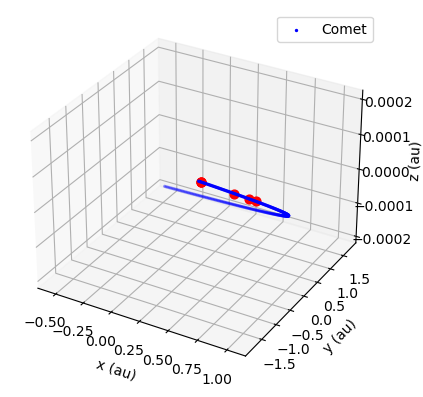

In [336]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data_c[:,0], data_c[:,1], data_c[:,2] , color='b', s=2, label='Comet')
ax.scatter(x1,y1,z1, color='red', s=40)
ax.scatter(x2,y2,z2, color='red', s=40)
ax.scatter(x3,y3,z3, color='red', s=40)
ax.scatter(x4,y4,z4, color='red', s=40)
ax.scatter(x5,y5,z5, color='red', s=40)
ax.scatter(x6,y6,z6, color='red', s=40)
ax.set_xlabel('x (au)')
ax.set_ylabel('y (au)')
ax.set_zlabel('z (au)')
plt.legend()
plt.show()

### Orbita del Cometa junto con la Orbita de la Tierra

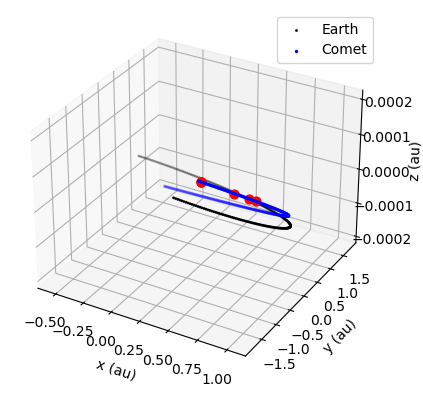

In [337]:
#######  EARTH
# Ecliptic J2000.0
t0 = Time('2023-07-09T00:00:00', scale='tdb', format='isot')

# Earth's ephemeris
iota = (4.164075603038432E-03*u.deg).to('rad') # inclination
Omega = (1.498625963929686E+02*u.deg).to('rad') # longitude of ascending node
omega = (3.146587763491455E+02*u.deg).to('rad') # argument of perihelion
a = (1.495582533630905E+08*u.km).to('au') # semi-major axis
ecc = 1.694863932474438E-02 # eccentricity
n = (1.141204629731537E-05*u.deg/u.s).to('rad/s') # mean motion
l0 = (1.817846947871890E+02*u.deg).to('rad') # mean anomaly

ti = Time('2023-07-08T00:00:00', scale='utc', format='isot')
N_days = 200

tspan_e, data_e = orbit(a,ecc,iota,Omega,omega,l0,n,t0,ti, N_days=N_days)
tspan_c, data_c = orbit(a_c,e_c,iota_c,Omega_c,omega_c,l0_c,n_c,t0_c,ti, N_days=N_days)



fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data_e[:,0], data_e[:,1], data_e[:,2] , color='k', s=1, label='Earth')
ax.scatter(data_c[:,0], data_c[:,1], data_c[:,2] , color='b', s=2, label='Comet')
ax.scatter(x1,y1,z1, color='red', s=40)
ax.scatter(x2,y2,z2, color='red', s=40)
ax.scatter(x3,y3,z3, color='red', s=40)
ax.scatter(x4,y4,z4, color='red', s=40)
ax.scatter(x5,y5,z5, color='red', s=40)
ax.scatter(x6,y6,z6, color='red', s=40)
ax.set_xlabel('x (au)')
ax.set_ylabel('y (au)')
ax.set_zlabel('z (au)')
plt.legend()
plt.show()



Podemos realizar un zoom a la región en donde las orbitas se cruzan,

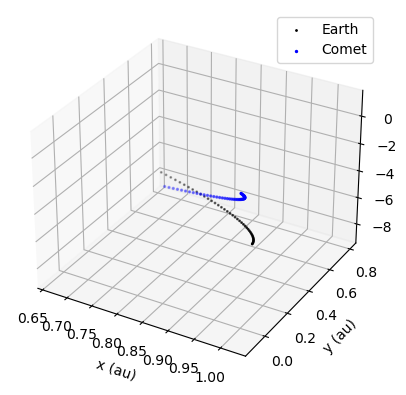

In [338]:
ti = Time('2023-10-01T00:00:00', scale='utc', format='isot')
N_days = 40

tspan_e, data_e = orbit(a,ecc,iota,Omega,omega,l0,n,t0,ti, N_days=N_days)
tspan_c, data_c = orbit(a_c,e_c,iota_c,Omega_c,omega_c,l0_c,n_c,t0_c,ti, N_days=N_days)



fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data_e[:,0], data_e[:,1], data_e[:,2] , color='k', s=1, label='Earth')
ax.scatter(data_c[:,0], data_c[:,1], data_c[:,2] , color='b', s=2, label='Comet')
ax.set_xlabel('x (au)')
ax.set_ylabel('y (au)')
ax.set_zlabel('z (au)')
plt.legend()
plt.show()

### Separación entre el C0meta y la Tierra

In [339]:
ti = Time('2023-10-01T00:00:00', scale='utc', format='isot')
N_days = 40

tspan_e, data_e = orbit(a,ecc,iota,Omega,omega,l0,n,t0,ti, N_days=N_days)
tspan_c, data_c = orbit(a_c,e_c,iota_c,Omega_c,omega_c,l0_c,n_c,t0_c,ti, N_days=N_days)

#distance = np.zeros(N_days)

distance = sqrt((data_e[:,0] - data_c[:,0])**2 + (data_e[:,1] - data_c[:,1])**2 + (data_e[:,2] - data_c[:,2])**2)

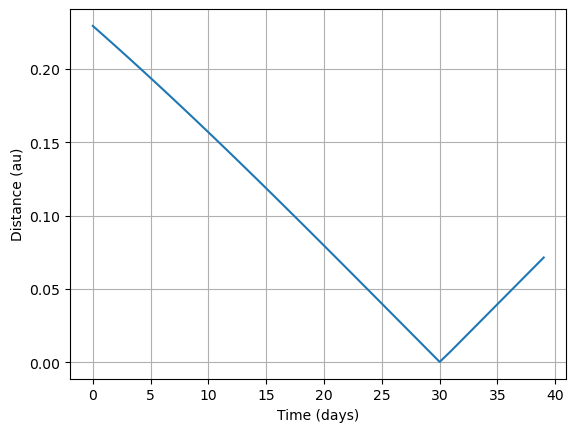

In [340]:
plt.figure()
plt.plot(range(N_days), distance)
plt.xlabel('Time (days)')
plt.ylabel('Distance (au)')
plt.grid()
plt.show()

### Busqueda detallada del punto de mayor acercamiento

In [341]:
def Kepler(E, l, ecc):
    return E - ecc*sin(E*u.rad) - (l.to('rad')).value

def position(a,e,iota,Omega,omega,l0,n,t0, ti):
    t0 = t0.utc
    ti = ti.utc
    l = l0 + (n*(ti-t0)).decompose()
    sol = root_scalar(Kepler, x0=0.0, x1=2*pi, args=(l,e))
    E = sol.root*u.rad
    f = 2*arctan(sqrt((1+e)/(1-e))*tan(E/2))
    phi = f + omega
    r = a*(1-e*cos(E))
    x = r*(cos(Omega)*cos(phi) - cos(iota)*sin(Omega)*sin(phi))
    y = r*(sin(Omega)*cos(phi) + cos(iota)*cos(Omega)*sin(phi))
    z = r*sin(iota)*sin(phi)
    return x,y,z


def separation(ti):
    x_e,y_e,z_e = position(a,ecc,iota,Omega,omega,l0,n,t0, ti)
    x_c,y_c,z_c = position(a_c,e_c,iota_c,Omega_c,omega_c,l0_c,n_c,t0_c, ti)
    return sqrt((x_e - x_c)**2 + (y_e - y_c)**2 + (z_e - z_c)**2)

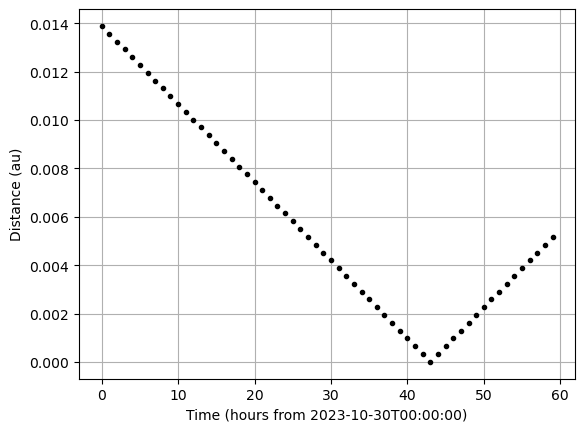

In [342]:
ti = Time('2023-10-30T00:00:00', scale='utc', format='isot')

plt.figure()
for h in range(60):
    plt.plot(h, separation(ti+h*u.hour), '.', color='k')

plt.xlabel('Time (hours from 2023-10-30T00:00:00)')
plt.ylabel('Distance (au)')
plt.grid()
plt.show()


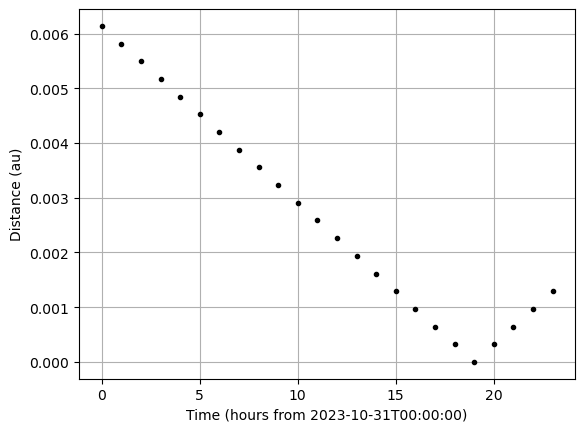

In [343]:
ti = Time('2023-10-31T00:00:00', scale='utc', format='isot')

plt.figure()
for h in range(24):
    plt.plot(h, separation(ti+h*u.hour), '.', color='k')

plt.xlabel('Time (hours from 2023-10-31T00:00:00)')
plt.ylabel('Distance (au)')
plt.grid()
plt.show()

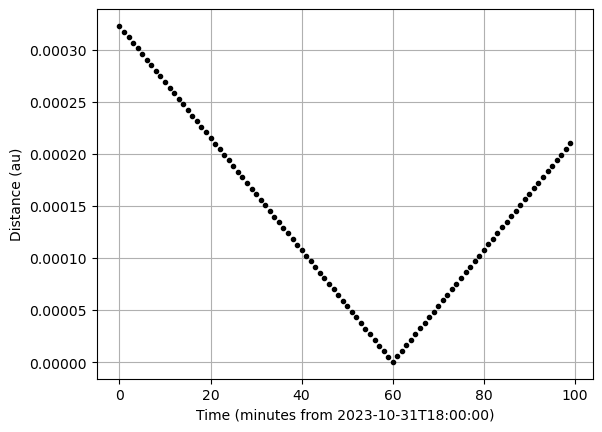

In [344]:
ti = Time('2023-10-31T18:00:00', scale='utc', format='isot')

plt.figure()
for h in range(100):
    plt.plot(h, separation(ti+h*u.minute), '.', color='k')

plt.xlabel('Time (minutes from 2023-10-31T18:00:00)')
plt.ylabel('Distance (au)')
plt.grid()
plt.show()

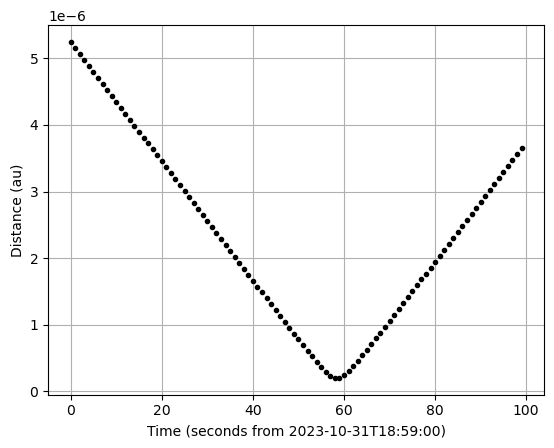

In [345]:
ti = Time('2023-10-31T18:59:00', scale='utc', format='isot')

plt.figure()
for h in range(100):
    plt.plot(h, separation(ti+h*u.second), '.', color='k')

plt.xlabel('Time (seconds from 2023-10-31T18:59:00)')
plt.ylabel('Distance (au)')
plt.grid()
plt.show()

In [367]:
ti = Time('2023-10-31T18:59:00', scale='utc', format='isot')

tc = Time('2023-10-31T18:59:00', scale='utc', format='isot')
min_sep = separation(tc)

for h in range(200):
    if separation(ti+h*u.second) < min_sep:
        tc = ti+h*u.second
        min_sep = separation(tc)

print('La separación mínima es:', min_sep, '=', min_sep.to('km'), 'y que ocurre en la fecha', tc, 'UT')


La separación mínima es: 2.0295305720954462e-07 AU = 30.361345210603158 km y que ocurre en la fecha 2023-10-31T18:59:58.000 UT


### Colisión con la superficie de la Tierra

In [361]:

tc = Time('2023-10-31T18:50:00', scale='utc', format='isot')

while separation(tc) > const.R_earth:
    tc = tc + 0.11*u.second

print('La colisión con la superficie de la Tierra ocurre en la fecha', tc, 'UT, a una distancia de ', separation(tc).to('km'),)


const.R_earth

La colisión con la superficie de la Tierra ocurre en la fecha 2023-10-31T18:52:03.420 UT, a una distancia de  6377.164474362607 km


<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal Earth equatorial radius' value=6378100.0 uncertainty=0.0 unit='m' reference='IAU 2015 Resolution B 3'>